# Characteristics of Inter-State Networks in the USA

## 1.1 Introduction

The Declaration of Independence created 13 newly independendant states which later came together to form a confederation under Article I and II of the US Constitution. The articles which dilineated the relation between the individual states and the Union through the words *"Each state retains its sovereignty, freedom, and independence, and every power, jurisdiction, and right, which is not by this Confederation expressly delegated to the United States, in Congress assembled."* also allows the individual states to decide themselves the nature of their relationships with other states. 

The states have developed linkages among themselves through various mediums like trade, migration, politics, media and communities which have varied over time. Michigan State University started the **Correlates of State Policy Project** aiming to compile, disseminate, and encourage the use of data relevant to U.S. state policy research, tracking policy differences across the 50 states. This analysis uses the State Networks dataset - a compilation of many state-to-state relational variables, including measures of shared borders, travel and trade between states, and demographic characteristics of state populations to arrive at a snapshot of what factors drive interstate relations.

Interstate relations are analysed along 3 aspects - political, social and individual, where each are measure through how a state influences another's policies, how much one state considers another state to be similar with itself and the likelihood of having facebook friends in the other state respectively.

The 2,550 units in the dataset are dyadic state-pairs (e.g., Alabama–Alaska, Alabama–Arizona, Alabama–Arkansas, and so on, for each state plus the District of Columbia). The data were collected from multiple sources and incorporate measures of similarity drawn from data in the Correlates of State Policy Project.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats
from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

Opening Database

In [2]:
sn=pd.read_csv('/Users/josephthomas/Documents/Projects/State Networks/Data/Raw Data/statenetworks.csv')

In [3]:
sn.columns

Index(['State1Abbr', 'State2Abbr', 'State1', 'State2', 'dyadid', 'S1region',
       'S2region', 'S1division', 'S2division', 'Border',
       ...
       'S2BlackProt', 'S2Catholic', 'S2Mormon', 'S2Jewish', 'S2Muslim',
       'S2Buddhist', 'S2Hindu', 'S2Nones', 'S2NothingParticular',
       'S2HighlyReligious'],
      dtype='object', length=124)

In [4]:
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',50)

**Snapshot of data and datatypes**

In [5]:
sn.describe()

,Border,Distance,State1_Lat,State1_Long,State2_Lat,State2_Long,ACS_Migration,PopDif,State1_Pop,State2_Pop,IncomingFlights,IRS_migration,Income,IRS_migration_2010,Income_2010,Imports,GSPDif,S1GSP,S2GSP,DemDif,S1AvgDem,S2AvgDem,S1SenDemProp,S1HSDemProp,S2SenDemProp,...,S1Evangelical,S1Mainline,S1BlackProt,S1Catholic,S1Mormon,S1Jewish,S1Muslim,S1Buddhist,S1Hindu,S1Nones,S1NothingParticular,S1HighlyReligious,S2Christian,S2Evangelical,S2Mainline,S2BlackProt,S2Catholic,S2Mormon,S2Jewish,S2Muslim,S2Buddhist,S2Hindu,S2Nones,S2NothingParticular,S2HighlyReligious
count,2550.000000,2450.000000,2500.000000,2500.000000,2450.000000,2450.000000,2550.000000,2.550000e+03,2.550000e+03,2.550000e+03,2550.000000,2.550000e+03,2.550000e+03,2550.000000,2.550000e+03,2.540000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.352000e+03,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,...,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,0.085490,1955.750731,39.450731,-93.465204,39.450730,-93.465204,2071.576078,0.000000e+00,6.313616e+06,6.313616e+06,399.251373,3.745944e+04,1.040503e+06,2071.576078,5.116756e+04,2.866001e+09,-2.882353e-01,3.629716e+05,3.629719e+05,-2.763610e-11,0.430266,0.430266,0.427660,0.432873,0.427660,...,0.258431,0.164118,0.056863,0.190000,0.028431,0.012549,0.006078,0.007255,0.003725,0.229020,0.161765,0.546667,0.711569,0.258431,0.164118,0.056863,0.190000,0.028431,0.012549,0.006078,0.007255,0.003725,0.229020,0.161765,0.546667
std,0.279665,1428.092762,5.728589,18.483460,5.728612,18.483536,4063.169711,1.022958e+07,7.162140e+06,7.162140e+06,1345.677099,7.588889e+04,2.294796e+06,4063.169711,1.093596e+05,6.000546e+09,6.527527e+05,4.570183e+05,4.570182e+05,2.466462e-01,0.172615,0.172615,0.187561,0.166123,0.187561,...,0.108890,0.057378,0.057320,0.086313,0.079410,0.014933,0.006884,0.011731,0.006557,0.055468,0.035415,0.105343,0.073482,0.108890,0.057378,0.057320,0.086313,0.079410,0.014933,0.006884,0.011731,0.006557,0.055468,0.035415,0.105343
min,0.000000,56.255615,21.308950,-157.826182,21.308950,-157.826200,3.000000,-3.851250e+07,5.734830e+05,5.734830e+05,0.000000,1.670000e+02,2.903000e+03,3.000000,6.800000e+01,5.559000e+02,-2.591640e+06,3.109100e+04,3.109100e+04,-7.697059e-01,0.141667,0.141667,0.133333,0.150000,0.133333,...,0.070000,0.060000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.090000,0.330000,0.540000,0.070000,0.060000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.090000,0.330000
25%,0.000000,958.964600,35.771000,-104.802000,35.771000,-104.802042,234.250000,-3.965876e+06,1.694182e+06,1.694182e+06,0.000000,4.120500e+03,1.000352e+05,234.250000,5.114250e+03,1.614807e+08,-2.257628e+05,8.467100e+04,8.467100e+04,-1.656564e-01,0.323232,0.323232,0.300000,0.338889,0.300000,...,0.190000,0.120000,0.020000,0.120000,0.010000,0.000000,0.000000,0.000000,0.000000,0.190000,0.130000,0.480000,0.650000,0.190000,0.120000,0.020000,0.120000,0.010000,0.000000,0.000000,0.000000,0.000000,0.190000,0.130000,0.480000
50%,0.000000,1605.739844,39.787096,-89.928686,39.787095,-89.928686,666.000000,0.000000e+00,4.404279e+06,4.404279e+06,12.000000,1.183350e+04,2.942860e+05,666.000000,1.528150e+04,7.431722e+08,0.000000e+00,2.098590e+05,2.098590e+05,0.000000e+00,0.404737,0.404737,0.416667,0.400000,0.416667,...,0.250000,0.160000,0.040000,0.180000,0.010000,0.010000,0.010000,0.010000,0.000000,0.220000,0.160000,0.540000,0.720000,0.250000,0.160000,0.040000,0.180000,0.010000,0.010000,0.010000,0.010000,0.000000,0.220000,0.160000,0.540000
75%,0.000000,2581.232277,42.733500,-78.638000,42.733500,-78.638000,1911.000000,3.965876e+06,7.318811e+06,7.318811e+06,215.000000,3.486075e+04,9.645632e+05,1911.000000,4.692100e+04,2.653647e+09,2.257628e+05,4.902380e+05,4.902380e+05,

In [6]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Columns: 124 entries, State1Abbr to S2HighlyReligious
dtypes: float64(90), int64(25), object(9)
memory usage: 2.4+ MB


## 1.2 Cleaning and Transforming the Data

In [7]:
sn.dtypes

State1Abbr                     object
State2Abbr                     object
State1                         object
State2                         object
dyadid                         object
S1region                       object
S2region                       object
S1division                     object
S2division                     object
Border                          int64
Distance                      float64
State1_Lat                    float64
State1_Long                   float64
State2_Lat                    float64
State2_Long                   float64
ACS_Migration                   int64
PopDif                          int64
State1_Pop                      int64
State2_Pop                      int64
IncomingFlights                 int64
IRS_migration                 float64
Income                          int64
IRS_migration_2010            float64
Income_2010                     int64
Imports                       float64
GSPDif                          int64
S1GSP       

**Converting some variables to categorical variables**

In [8]:
sn['S1region']=sn['S1region'].astype('category')
sn['S2region']=sn['S2region'].astype('category')

In [9]:
sn['S1division']=sn['S1division'].astype('category')
sn['S2division']=sn['S2division'].astype('category')

In [10]:
sn.dtypes

State1Abbr                      object
State2Abbr                      object
State1                          object
State2                          object
dyadid                          object
S1region                      category
S2region                      category
S1division                    category
S2division                    category
Border                           int64
Distance                       float64
State1_Lat                     float64
State1_Long                    float64
State2_Lat                     float64
State2_Long                    float64
ACS_Migration                    int64
PopDif                           int64
State1_Pop                       int64
State2_Pop                       int64
IncomingFlights                  int64
IRS_migration                  float64
Income                           int64
IRS_migration_2010             float64
Income_2010                      int64
Imports                        float64
GSPDif                   

### 1.2.1 Handling Missing Values

In [11]:
sn.isnull().sum()

State1Abbr                      0
State2Abbr                      0
State1                          0
State2                          0
dyadid                          0
S1region                       50
S2region                       50
S1division                     50
S2division                     50
Border                          0
Distance                      100
State1_Lat                     50
State1_Long                    50
State2_Lat                    100
State2_Long                   100
ACS_Migration                   0
PopDif                          0
State1_Pop                      0
State2_Pop                      0
IncomingFlights                 0
IRS_migration                   0
Income                          0
IRS_migration_2010              0
Income_2010                     0
Imports                        10
GSPDif                          0
S1GSP                           0
S2GSP                           0
DemDif                        198
S1AvgDem      

In [12]:
sn[sn["State1"]=="District of Columbia"].isnull().sum()

State1Abbr                     0
State2Abbr                     0
State1                         0
State2                         0
dyadid                         0
S1region                      50
S2region                       0
S1division                    50
S2division                     0
Border                         0
Distance                      50
State1_Lat                    50
State1_Long                   50
State2_Lat                    50
State2_Long                   50
ACS_Migration                  0
PopDif                         0
State1_Pop                     0
State2_Pop                     0
IncomingFlights                0
IRS_migration                  0
Income                         0
IRS_migration_2010             0
Income_2010                    0
Imports                        0
GSPDif                         0
S1GSP                          0
S2GSP                          0
DemDif                        50
S1AvgDem                      50
S2AvgDem  


- **The District of Columbia has missing values** in several variables because of the fact that it isn't a full state of the United States of America. Variables dealing with policymaking and composition of the Senate and House do not apply to it. Furthermore, DC doesn't have data on 2 of the dependant variables -perceived similarity and policy influences.

Hence, removing it from our dataset. This reduces the number of observations to 2450.



In [13]:
sn=sn.drop(sn.index[sn["State1"]=="District of Columbia"])
sn=sn.drop(sn.index[sn["State2"]=="District of Columbia"])

In [14]:
sn[sn["S1SenDemProp"].isnull()]["State1"].value_counts()

Nebraska    49
Name: State1, dtype: int64

In [15]:
sn[sn["S2SenDemProp"].isnull()]["State2"].value_counts()

Nebraska    49
Name: State2, dtype: int64

In [16]:
sn[sn["S1HSDemProp"].isnull()]["State1"].value_counts()

Nebraska    49
Name: State1, dtype: int64

In [17]:
sn[sn["S2HSDemProp"].isnull()]["State2"].value_counts()

Nebraska    49
Name: State2, dtype: int64

In [18]:
sn["S1SenDemProp"]=sn["S1SenDemProp"].replace([np.nan], 0.244898)

In [19]:
sn["S2SenDemProp"]=sn["S2SenDemProp"].replace([np.nan], 0.244898)

In [20]:
sn["S1HSDemProp"]=sn["S1HSDemProp"].replace([np.nan], 0.2448)

In [21]:
sn["S2HSDemProp"]=sn["S2HSDemProp"].replace([np.nan], 0.2448)

- **The missing data in State Senate and House Democrat Proportions is from Nebraska.** There is some ambivalence due to the unicameral charactristic of Nebraska's State Legislation. Since the state of Nebraska only has a unicameral parliament, its single house acts as both the House and Senate. This analysis includes the proportion of Democrats in Nebraska's single house in both House and Senate (indirectly implying that the single house acts as both house and senate when compared to other states) to compare with other states.

The share of Democrats in Nebraska's single house was 24.48%.
_source: https://ballotpedia.org/Nebraska_State_Senate_elections,_2016_

**Transforming the aggregated representation variables to include this update**

In [22]:
sn["S1AvgDem"]=(sn["S1SenDemProp"]+sn["S1HSDemProp"])/2
sn["S2AvgDem"]=(sn["S2SenDemProp"]+sn["S2HSDemProp"])/2
sn["DemDif"]=sn["S1AvgDem"]-sn["S2AvgDem"]

In [23]:
sn[sn["State1PolSocLib"].isnull()]["State1"].value_counts()

Series([], Name: State1, dtype: int64)

In [24]:
sn["S1EconomicLiberalism S1SocialLiberalism State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib".split()].corr()

,S1EconomicLiberalism,S1SocialLiberalism,State1PolSocLib,State1PolEconLib,State1MassSocLib,State1MassEconLib
S1EconomicLiberalism,1.000000,0.524754,0.539506,0.743863,0.544327,0.766882
S1SocialLiberalism,0.524754,1.000000,0.813092,0.721870,0.937802,0.650152
State1PolSocLib,0.539506,0.813092,1.000000,0.855289,0.829498,0.705518
State1PolEconLib,0.743863,0.721870,0.855289,1.000000,0.770443,0.779512
State1MassSocLib,0.544327,0.937802,0.829498,0.770443,1.000000,0.718845
State1MassEconLib,0.766882,0.650152,0.705518,0.779512,0.718845,1.000000


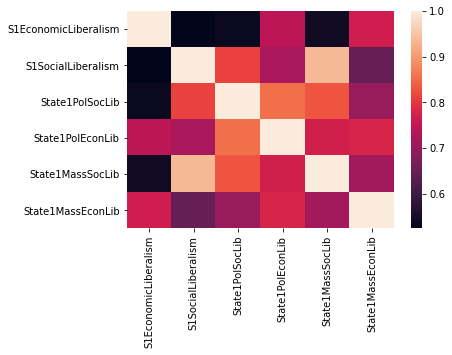

In [25]:
sns.heatmap(sn["S1EconomicLiberalism S1SocialLiberalism State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib".split()].corr())

In [26]:
sn["S2EconomicLiberalism S2SocialLiberalism State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib".split()].corr()

,S2EconomicLiberalism,S2SocialLiberalism,State2PolSocLib,State2PolEconLib,State2MassSocLib,State2MassEconLib
S2EconomicLiberalism,1.000000,0.524754,0.376421,0.411133,0.400708,0.407224
S2SocialLiberalism,0.524754,1.000000,0.470277,0.316468,0.448039,0.321976
State2PolSocLib,0.376421,0.470277,1.000000,0.853185,0.832803,0.702613
State2PolEconLib,0.411133,0.316468,0.853185,1.000000,0.774691,0.777513
State2MassSocLib,0.400708,0.448039,0.832803,0.774691,1.000000,0.720087
State2MassEconLib,0.407224,0.321976,0.702613,0.777513,0.720087,1.000000


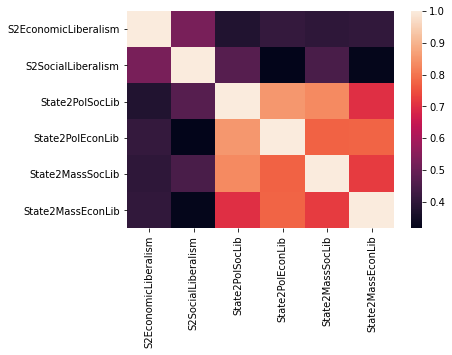

In [27]:
sns.heatmap(sn["S2EconomicLiberalism S2SocialLiberalism State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib".split()].corr())

There is sufficient correlation between the aggregated and disaggregated liberalism score indices with a disproportionately large number of missing values in the aggregated indices. The data for 4 states are missing and isn't available in the public domain for manal addition.  Thus I drop the aggregated liberalism indices and fix missing value issues in the disaggregated liberalism scores.

In [28]:
delpsl=sn[sn["State1"]=="Delaware"]["State1PolSocLib"].head(1).item()
delpel=sn[sn["State1"]=="Delaware"]["State1PolEconLib"].head(1).item()
delmsl=sn[sn["State1"]=="Delaware"]["State1MassSocLib"].head(1).item()
delmel=sn[sn["State1"]=="Delaware"]["State1MassEconLib"].head(1).item()

Adding Delaware data that is available in dyads where it is the first state to those where it is the 2nd state.

In [29]:
sn["State2PolSocLib"]=sn["State2PolSocLib"].replace(np.nan,delpsl)
sn["State2PolEconLib"]=sn["State2PolEconLib"].replace(np.nan,delpel)
sn["State2MassSocLib"]=sn["State2MassSocLib"].replace(np.nan,delmsl)
sn["State2MassEconLib"]=sn["State2MassEconLib"].replace(np.nan,delmel)

In [30]:
sn["PolSocLibDif"]=sn["State1PolSocLib"]-sn["State2PolSocLib"]
sn["PolEconLibDif"]=sn["State1PolEconLib"]-sn["State2PolEconLib"]
sn["MassSocLibDif"]=sn["State1MassSocLib"]-sn["State2MassSocLib"]
sn["MassEconLibDif"]=sn["State1MassEconLib"]-sn["State2MassEconLib"]

    For imputing missing values

In [ ]:
isn=sn["State1 S1region S1division S1EconomicLiberalism S1SocialLiberalism ACS_Migration State1_Pop IncomingFlights IRS_migration IRS_migration_2010 Income Income_2010 Imports S1GSP S1AvgDem S1SenDemProp S1HSDemProp S1Ideology S1PID policy_diffusion_tie policy_diffusion_2015 policy_diffusion_2000.2015 State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib perceived_similarity fb_friend_index S1Latino S1White S1Black S1Asian S1Native S1Christian S1Jewish S1Muslim S1Buddhist S1Hindu S1Nones S1NothingParticular S1HighlyReligious".split()].groupby(sn["State1"]).mean()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2, max_iter=30,tol=1e-20, imputation_order='roman')

In [ ]:
imsn=imp.fit_transform(isn)

In [ ]:
isn=isn.reset_index()


In [ ]:
idx=isn[isn["S1EconomicLiberalism"].isnull()].index
idx2=isn[isn["S1SocialLiberalism"].isnull()].index

In [ ]:
isn.iloc[idx,1]=imsn[idx,0]
isn.iloc[idx2,2]=imsn[idx2,1]

In [ ]:
sn.loc[sn["State1"]=="Nebraska","S1EconomicLiberalism"]=isn[isn["State1"]=="Nebraska"]["S1EconomicLiberalism"].item()
sn.loc[sn["State1"]=="Hawaii","S1EconomicLiberalism"]=isn[isn["State1"]=="Hawaii"]["S1EconomicLiberalism"].item()
sn.loc[sn["State1"]=="Alaska","S1EconomicLiberalism"]=isn[isn["State1"]=="Alaska"]["S1EconomicLiberalism"].item()
sn.loc[sn["State2"]=="Nebraska","S2EconomicLiberalism"]=isn[isn["State1"]=="Nebraska"]["S1EconomicLiberalism"].item()
sn.loc[sn["State2"]=="Hawaii","S2EconomicLiberalism"]=isn[isn["State1"]=="Hawaii"]["S1EconomicLiberalism"].item()
sn.loc[sn["State2"]=="Alaska","S2EconomicLiberalism"]=isn[isn["State1"]=="Alaska"]["S1EconomicLiberalism"].item()
sn.loc[sn["State1"]=="Nebraska","S1SocialLiberalism"]=isn[isn["State1"]=="Nebraska"]["S1SocialLiberalism"].item()
sn.loc[sn["State1"]=="Hawaii","S1SocialLiberalism"]=isn[isn["State1"]=="Hawaii"]["S1SocialLiberalism"].item()
sn.loc[sn["State1"]=="Alaska","S1SocialLiberalism"]=isn[isn["State1"]=="Alaska"]["S1SocialLiberalism"].item()
sn.loc[sn["State2"]=="Nebraska","S2SocialLiberalism"]=isn[isn["State1"]=="Nebraska"]["S1SocialLiberalism"].item()
sn.loc[sn["State2"]=="Hawaii","S2SocialLiberalism"]=isn[isn["State1"]=="Hawaii"]["S1SocialLiberalism"].item()
sn.loc[sn["State2"]=="Alaska","S2SocialLiberalism"]=isn[isn["State1"]=="Alaska"]["S1SocialLiberalism"].item()

In [ ]:
sn.isnull().sum()

In [ ]:
sn["ELibDif"]=sn["S1EconomicLiberalism"]-sn["S2EconomicLiberalism"]
sn["SLibDif"]=sn["S1SocialLiberalism"]-sn["S2SocialLiberalism"]

 - Dropping variables that are irrelevant to current analysis

In [ ]:
to_drop = "State1Abbr State2Abbr State1 State2 LibDif".split()

In [31]:
to_drop = "State1Abbr State2Abbr State1 State2 LibDif ELibDif SLibDif S1EconomicLiberalism S1SocialLiberalism S2EconomicLiberalism S2SocialLiberalism".split()

In [32]:
sn=sn.drop(to_drop, axis=1)

In [33]:
sn.isnull().sum()

dyadid                        0
S1region                      0
S2region                      0
S1division                    0
S2division                    0
Border                        0
Distance                      0
State1_Lat                    0
State1_Long                   0
State2_Lat                    0
State2_Long                   0
ACS_Migration                 0
PopDif                        0
State1_Pop                    0
State2_Pop                    0
IncomingFlights               0
IRS_migration                 0
Income                        0
IRS_migration_2010            0
Income_2010                   0
Imports                       1
GSPDif                        0
S1GSP                         0
S2GSP                         0
DemDif                        0
S1AvgDem                      0
S2AvgDem                      0
S1SenDemProp                  0
S1HSDemProp                   0
S2SenDemProp                  0
S2HSDemProp                   0
Ideology

In [34]:
sn["SameRegion"]= sn["S1region"]==sn["S2region"]
sn["SameDivision"]= sn["S1division"]==sn["S2division"]

In [35]:
varlist="dyadid S1region S2region SameRegion S1division S2division SameDivision Border Distance PopDif ACS_Migration State1_Pop State2_Pop IncomingFlights IRS_migration IRS_migration_2010 Income Income_2010 Imports GSPDif S1GSP S2GSP DemDif S1AvgDem S2AvgDem S1SenDemProp S1HSDemProp S2SenDemProp S2HSDemProp IdeologyDif PIDDif S1Ideology S1PID S2Ideology S2PID policy_diffusion_tie policy_diffusion_2015 policy_diffusion_2000.2015 MassSocLibDif MassEconLibDif PolSocLibDif PolEconLibDif State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib perceived_similarity fb_friend_index RaceDif LatinoDif WhiteDif BlackDif AsianDif NativeDif S1Latino S1White S1Black S1Asian S1Native S2Latino S2White S2Black S2Asian S2Native ReligDif ChristianDif JewishDif MuslimDif BuddhistDif HinduDif NonesDif NPDif S1Christian S1Jewish S1Muslim S1Buddhist S1Hindu S1Nones S1NothingParticular S1HighlyReligious S2Christian S2Jewish S2Muslim S2Buddhist S2Hindu S2Nones S2NothingParticular S2HighlyReligious".split()

In [36]:
econvar= "Border Distance policy_diffusion_tie policy_diffusion_2015 policy_diffusion_2000.2015 perceived_similarity fb_friend_index PopDif ACS_Migration State1_Pop State2_Pop IncomingFlights IRS_migration IRS_migration_2010 Income Income_2010 Imports GSPDif S1GSP S2GSP".split()

In [37]:
sn.to_csv('/Users/josephthomas/Documents/Projects/State Networks/Data/Cleaned Data/statenetworks.csv')

## 2. Data Analysis and Visualization

In [38]:
sns.set_context("notebook")
color = sns.color_palette("twilight")

   ### 2.1 Assessing Location Characteristics

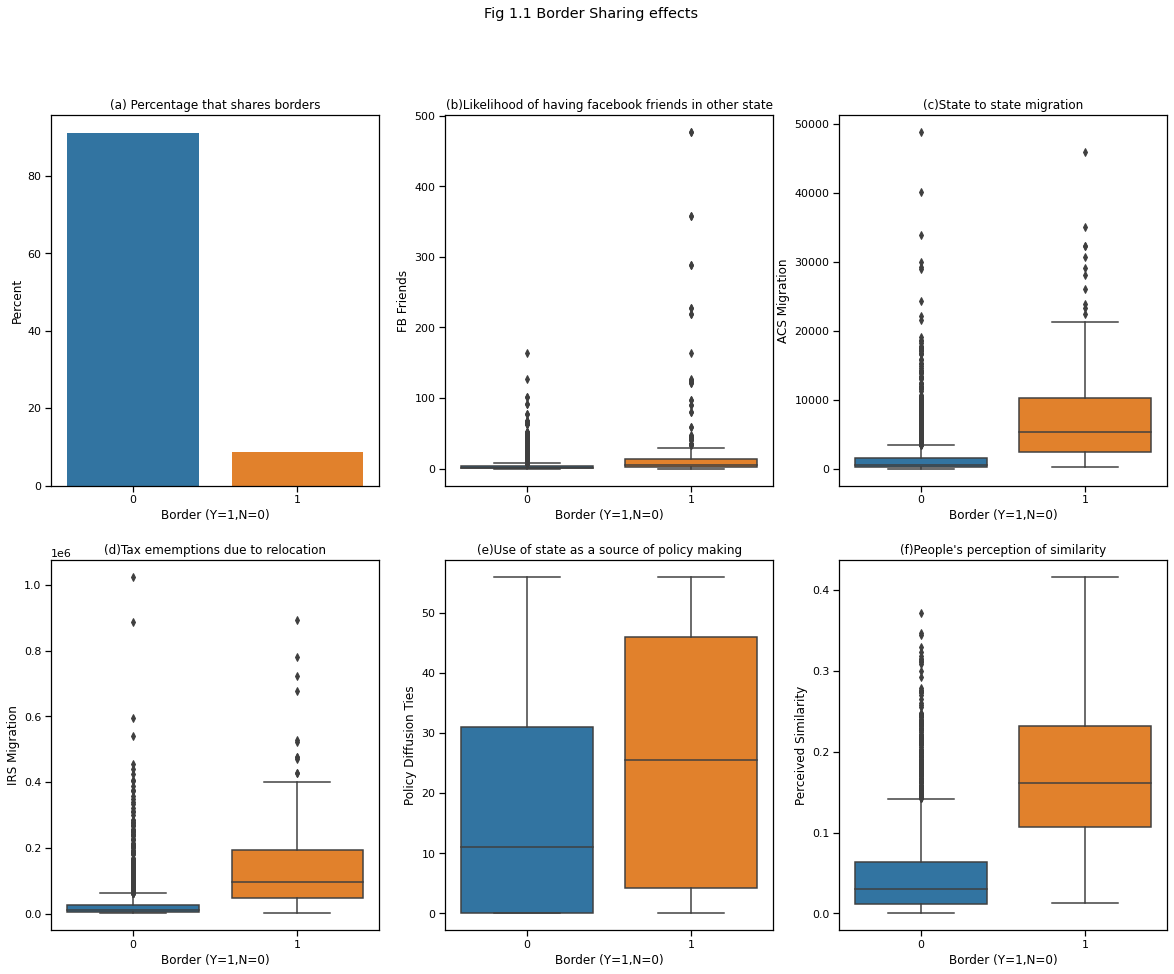

In [49]:
f1, ax = plt.subplots(2,3, figsize=(20,15))
f1.suptitle("Fig 1.1 Border Sharing effects")
sns.barplot(x='Border', y='Border',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Border (Y=1,N=0)", title = '(a) Percentage that shares borders')
sns.boxplot(x='Border', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Border (Y=1,N=0)", title = '(b)Likelihood of having facebook friends in other state')
sns.boxplot(x='Border', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "Border (Y=1,N=0)", title = '(c)State to state migration')
sns.boxplot(x='Border', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Border (Y=1,N=0)", title = '(d)Tax ememptions due to relocation')
sns.boxplot(x='Border', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "Border (Y=1,N=0)", title = '(e)Use of state as a source of policy making')
sns.boxplot(x='Border', y='perceived_similarity',data=sn, ax=ax[1,2])

ax[1,2].set(ylabel="Perceived Similarity", xlabel = "Border (Y=1,N=0)", title = "(f)People's perception of similarity")
f1.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f11Border.png')

#### Hypothesis Testing



In [66]:
#Hypothesis Testing
a=sn[sn["Border"]==1]
b=sn[sn["Border"]==0]
#perceived_similarity
tps,pps = stats.ttest_ind(a["perceived_similarity"],b["perceived_similarity"],equal_var=False)
print("TTest for perceived similarity:",tps,"\n\t p-value: ",pps)

#fb_friend_index
tfi,pfi = stats.ttest_ind(a["fb_friend_index"],b["fb_friend_index"],equal_var=False)
print("TTest for FB Friends:",tfi,"\n\t p-value: ",pfi)
#fb_friend_index
kffi,pffi = stats.kstest(a["fb_friend_index"],b["fb_friend_index"],'less')
print("Kolmogorov Smirnov for FB Friends:",kffi,"\n\t p-value: ",pffi)

#'policy_diffusion_tie
tpt,ppt = stats.ttest_ind(a['policy_diffusion_tie'],b['policy_diffusion_tie'],equal_var=False)
print("TTest for policy influences:",tpt,"\n\t p-value: ",ppt)

#'policy_diffusion_tie
ttf,ptf = stats.ttest_ind(a['IRS_migration'],b['IRS_migration'],equal_var=False)
print("TTest for state changes in filing tax returns:",ttf,"\n\t p-value: ",ptf)

#'policy_diffusion_tie
tam,pam = stats.ttest_ind(a['ACS_Migration'],b['ACS_Migration'],equal_var=False)
print("TTest for migration:",tam,"\n\t p-value: ",pam)

TTest for perceived similarity: 20.153259955779582 
	 p-value:  9.757332836795217e-53
TTest for FB Friends: 5.175708142290051 
	 p-value:  5.223259601906834e-07
Kolmogorov Smirnov for FB Friends: 0.40823483189273235 
	 p-value:  6.82515966043816e-30
TTest for policy influences: 5.7276984501515935 
	 p-value:  2.951123430430098e-08
TTest for state changes in filing tax returns: 11.49966276413547 
	 p-value:  2.842238540563713e-24
TTest for migration: 11.739984669461753 
	 p-value:  4.848995570334652e-25


In [41]:
sn[sn["Border"]==0][["ACS_Migration", "dyadid"]].sort_values(by="ACS_Migration",axis=0,ascending=False).head()

,ACS_Migration,dyadid
2154,48877,TX-CA
481,40195,FL-NY
242,33914,CA-TX
2159,29981,TX-FL
1609,29204,NY-FL


### Border sharing effects (Fig 1.1)
- Only <10% of dyadic relationships are across state borders (Fig 1.1). Nevertheless, being neighbors are seen to have strong effects on the relationships between them.
    - People in these states are on average 4 times more likely to find those in border states to be similar to themselves. There is also greater migration between states sharing borders including by those travelling for work. In the case of migrations there are exceptions (outliers) to the rule where there are examples of large migration between states that do not share borders. Example: TX-CA, FL-NY, WA-CA, NC-FL
    - Sharing borders only have a small effect on the likelihood of having facebook friends in the other state. 
    - States that share borders are more likely to influence policies in each other than states that do not share borders but the size of the border sharing effect is not very large. This also makes intuitive sense as states that share borders are more likely to face similar issues.
    - But all these differences are statistically significant as shown by the ttests. This implies that states that share a border are more likely to perceive residents of each other to be similar, more likely to be facebook friends in the other state and more likely to influence policy. 


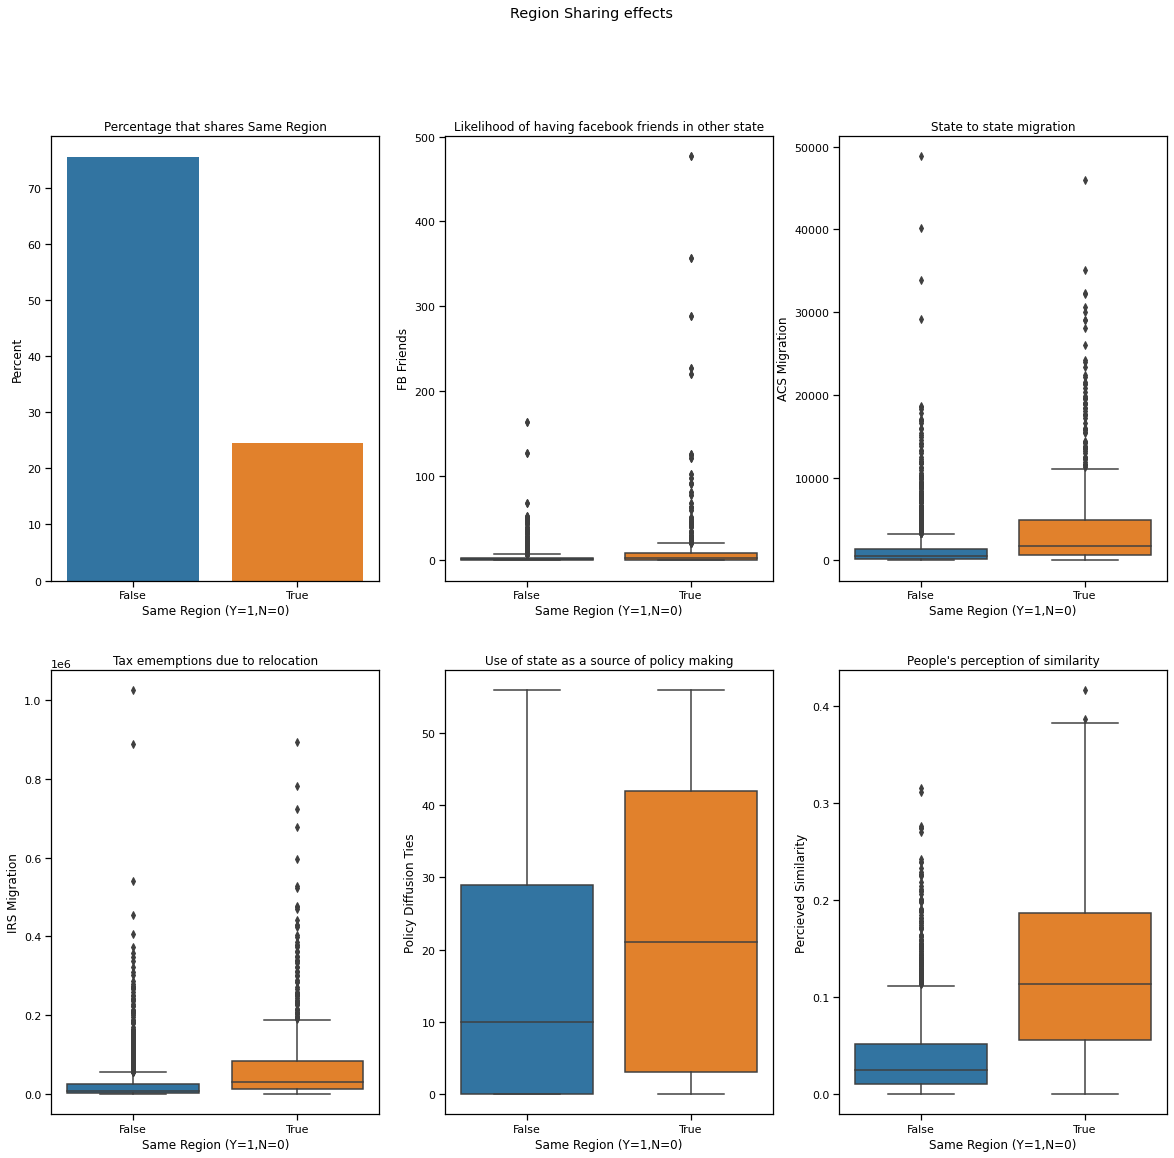

In [42]:
f12, ax = plt.subplots(2,3, figsize=(20,18))
f12.suptitle(" Fig 1.2 Region Sharing effects")
sns.barplot(x='SameRegion', y='SameRegion',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Same Region (Y=1,N=0)", title = 'Percentage that shares Same Region')
sns.boxplot(x='SameRegion', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Same Region (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.boxplot(x='SameRegion', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'State to state migration')
sns.boxplot(x='SameRegion', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.boxplot(x='SameRegion', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "Same Region (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.boxplot(x='SameRegion', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "Same Region (Y=1,N=0)", title = "People's perception of similarity")
f12.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f12Region.png')

In [77]:
#Hypothesis Testing Region Affects
a=sn[sn["SameRegion"]==1]
b=sn[sn["SameRegion"]==0]
#perceived_similarity
tps,pps = stats.ttest_ind(a["perceived_similarity"],b["perceived_similarity"],equal_var=False)
print("TTest for perceived similarity:",tps,"\n\t p-value: ",pps)

#fb_friend_index
tfi,pfi = stats.ttest_ind(a["fb_friend_index"],b["fb_friend_index"],equal_var=False)
print("TTest for FB Friends:",tfi,"\n\t p-value: ",pfi)
#fb_friend_index
kffi,pffi = stats.kstest(a["fb_friend_index"],b["fb_friend_index"],'less')
print("Kolmogorov Smirnov for FB Friends:",kffi,"\n\t p-value: ",pffi)

#'policy_diffusion_tie
tpt,ppt = stats.ttest_ind(a['policy_diffusion_tie'],b['policy_diffusion_tie'],equal_var=False)
print("TTest for policy influences:",tpt,"\n\t p-value: ",ppt)

#'policy_diffusion_tie
ttf,ptf = stats.ttest_ind(a['IRS_migration'],b['IRS_migration'],equal_var=False)
print("TTest for state changes in filing tax returns:",ttf,"\n\t p-value: ",ptf)

#'policy_diffusion_tie
tam,pam = stats.ttest_ind(a['ACS_Migration'],b['ACS_Migration'],equal_var=False)
print("TTest for migration:",tam,"\n\t p-value: ",pam)

TTest for perceived similarity: 23.350303338097 
	 p-value:  2.951391398065282e-89
TTest for FB Friends: 6.147972581385003 
	 p-value:  1.4107409666721796e-09
Kolmogorov Smirnov for FB Friends: 0.24027027027027026 
	 p-value:  8.881784197001252e-16
TTest for policy influences: 7.740308076412959 
	 p-value:  2.583446491410361e-14
TTest for state changes in filing tax returns: 10.354181239144271 
	 p-value:  1.79248844464458e-23
TTest for migration: 10.437239151996222 
	 p-value:  8.558204114185535e-24


In [73]:
sn.loc[sn["fb_friend_index"]>100][["dyadid", "Border","SameRegion","SameDivision","fb_friend_index"]].sort_values("fb_friend_index", ascending=False).head(10)

,dyadid,Border,SameRegion,SameDivision,fb_friend_index
1088,MA-RI,1,True,True,477.231479
1971,RI-MA,1,True,True,477.226914
320,CT-MA,1,True,True,357.477431
1056,MA-CT,1,True,True,357.476156
1471,NH-MA,1,True,True,288.802925
1078,MA-NH,1,True,True,288.802196
369,DE-MD,1,True,True,227.215311
1007,MD-DE,1,True,True,227.214479
338,CT-RI,1,True,True,219.592312
1956,RI-CT,1,True,True,219.590638


In [71]:
sn.loc[sn["Border"]==0][["dyadid", "Border","SameRegion","SameDivision","fb_friend_index","Distance"]].sort_values("fb_friend_index", ascending=False).head(20)

,dyadid,Border,SameRegion,SameDivision,fb_friend_index,Distance
1507,NJ-DE,0,False,False,163.678532,135.188520
1907,PA-DE,0,False,False,126.376366,168.963936
554,HI-CA,0,True,True,101.926517,3961.703995
210,CA-HI,0,True,True,101.924646,3961.703995
1506,NJ-CT,0,True,False,91.456711,245.152192
329,CT-NJ,0,True,False,91.456518,245.152192
1079,MA-NJ,0,True,False,76.857619,384.238107
1521,NJ-MA,0,True,False,76.857534,384.238107
970,ME-MA,0,True,True,68.193150,253.975023
1069,MA-ME,0,True,True,68.191754,253.975023


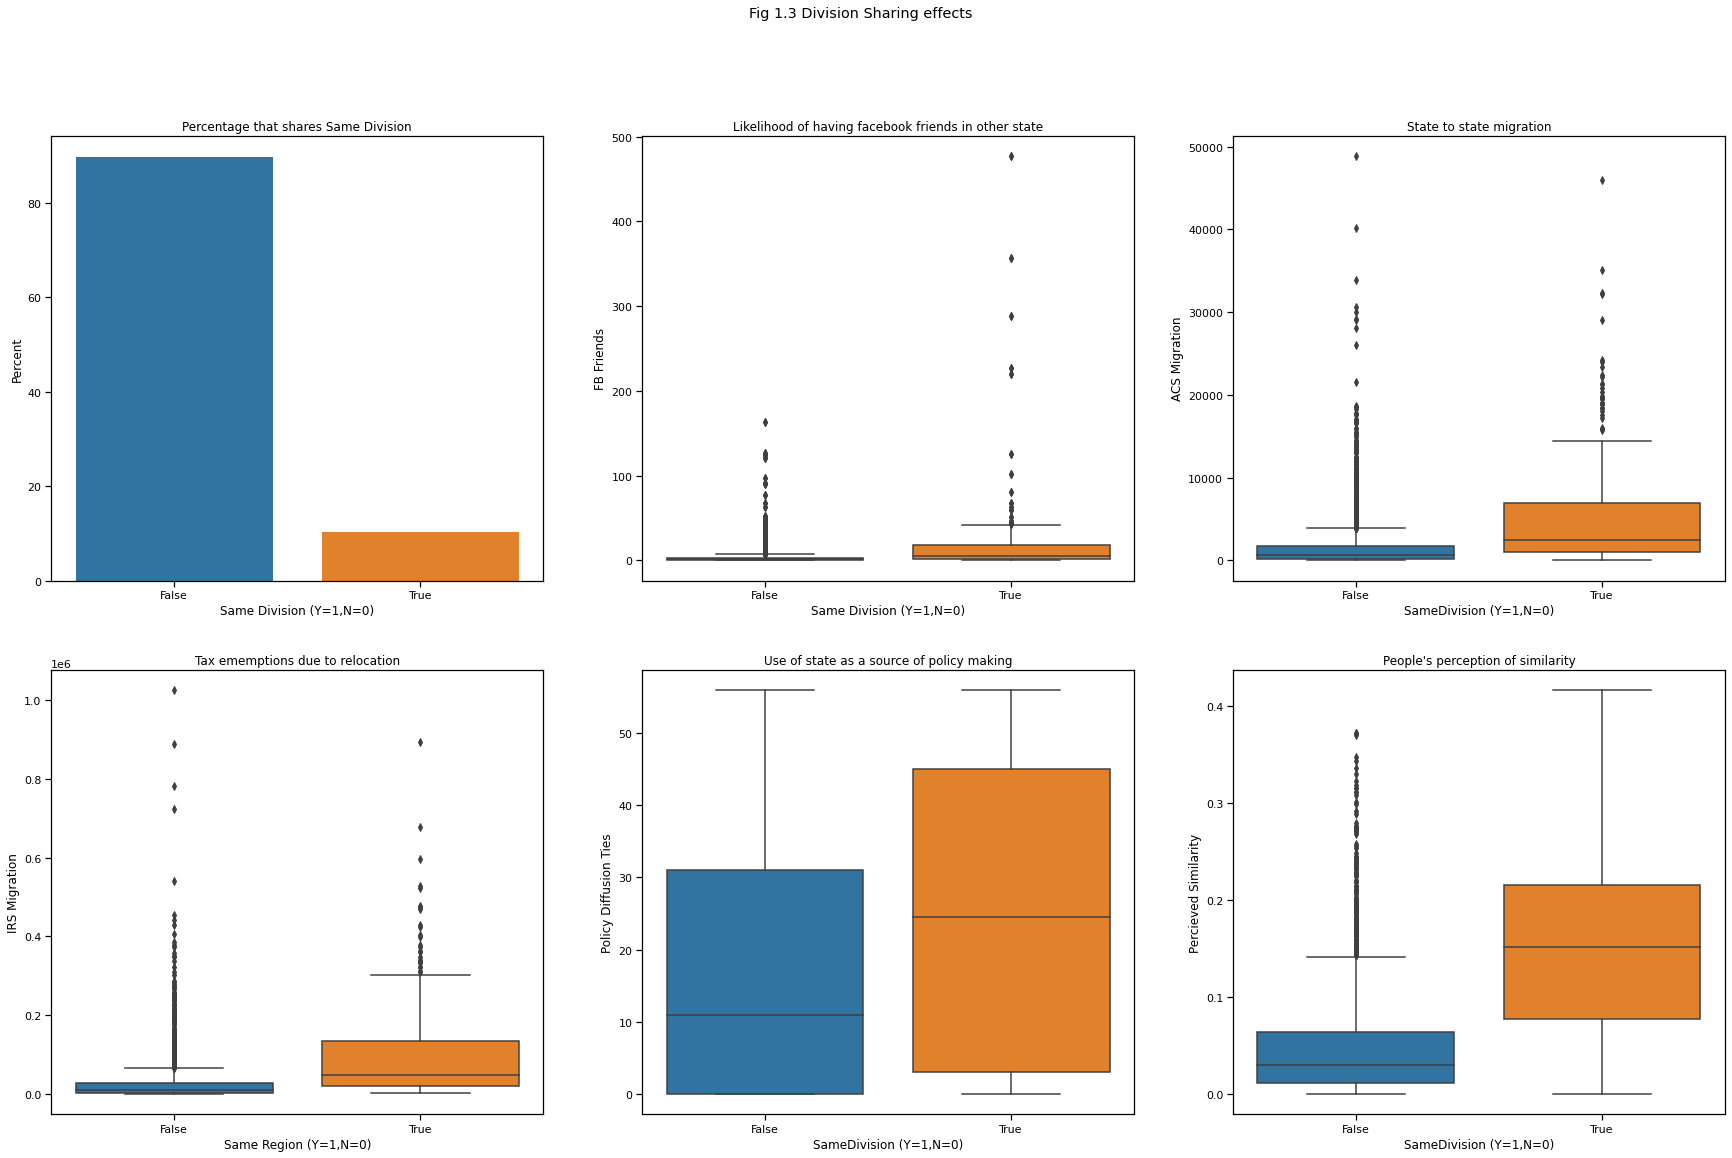

In [78]:
f14, ax = plt.subplots(2,3, figsize=(30,18))
f14.suptitle("Fig 1.3 Division Sharing effects")
sns.barplot(x='SameDivision', y='SameDivision',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Same Division (Y=1,N=0)", title = 'Percentage that shares Same Division')
sns.boxplot(x='SameDivision', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Same Division (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.boxplot(x='SameDivision', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "SameDivision (Y=1,N=0)", title = 'State to state migration')
sns.boxplot(x='SameDivision', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.boxplot(x='SameDivision', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "SameDivision (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.boxplot(x='SameDivision', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "SameDivision (Y=1,N=0)", title = "People's perception of similarity")
f14.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f14Division.png')

In [74]:
#Hypothesis Testing Division Affects
a=sn[sn["SameDivision"]==1]
b=sn[sn["SameDivision"]==0]
#perceived_similarity
tps,pps = stats.ttest_ind(a["perceived_similarity"],b["perceived_similarity"],equal_var=False)
print("TTest for perceived similarity:",tps,"\n\t p-value: ",pps)

#fb_friend_index
tfi,pfi = stats.ttest_ind(a["fb_friend_index"],b["fb_friend_index"],equal_var=False)
print("TTest for FB Friends:",tfi,"\n\t p-value: ",pfi)
#fb_friend_index
kffi,pffi = stats.kstest(a["fb_friend_index"],b["fb_friend_index"],'less')
print("Kolmogorov Smirnov for FB Friends:",kffi,"\n\t p-value: ",pffi)

#'policy_diffusion_tie
tpt,ppt = stats.ttest_ind(a['policy_diffusion_tie'],b['policy_diffusion_tie'],equal_var=False)
print("TTest for policy influences:",tpt,"\n\t p-value: ",ppt)

#'policy_diffusion_tie
ttf,ptf = stats.ttest_ind(a['IRS_migration'],b['IRS_migration'],equal_var=False)
print("TTest for state changes in filing tax returns:",ttf,"\n\t p-value: ",ptf)

#'policy_diffusion_tie
tam,pam = stats.ttest_ind(a['ACS_Migration'],b['ACS_Migration'],equal_var=False)
print("TTest for migration:",tam,"\n\t p-value: ",pam)

TTest for perceived similarity: 17.89479604918335 
	 p-value:  4.224143496804834e-48
TTest for FB Friends: 5.040447990012128 
	 p-value:  8.812845264924633e-07
Kolmogorov Smirnov for FB Friends: 0.399825021872266 
	 p-value:  2.0997402287904125e-33
TTest for policy influences: 5.735517464930149 
	 p-value:  2.3616429110857345e-08
TTest for state changes in filing tax returns: 8.560916478434484 
	 p-value:  9.05459175190629e-16
TTest for migration: 8.46803190494168 
	 p-value:  1.7108636136308543e-15


Similar effects are seen for state-state relationships from the same region and same division but to a smaller extent for every variable other than perception of similarity. States belonging to a region and division perceive others of the same region and division to be similar to them. (Fig 1.2 and Fig 1.3)
    - Looking at FB Friends Across shared borders out of the states having friends in other states, New England states take the top 8/10 spots having friends in other NE states. The other two spots are occupied by Maryland and Delaware and vice versa.  And 18 of top 20 states share their border.
    - MA and CA, NV and HI, HI and CA have high likelihood of having fb friends in each other, despite not sharing borders and being at distances of greater than 4000 miles.

### 2.2 Understanding Socioeconomic Characteristics

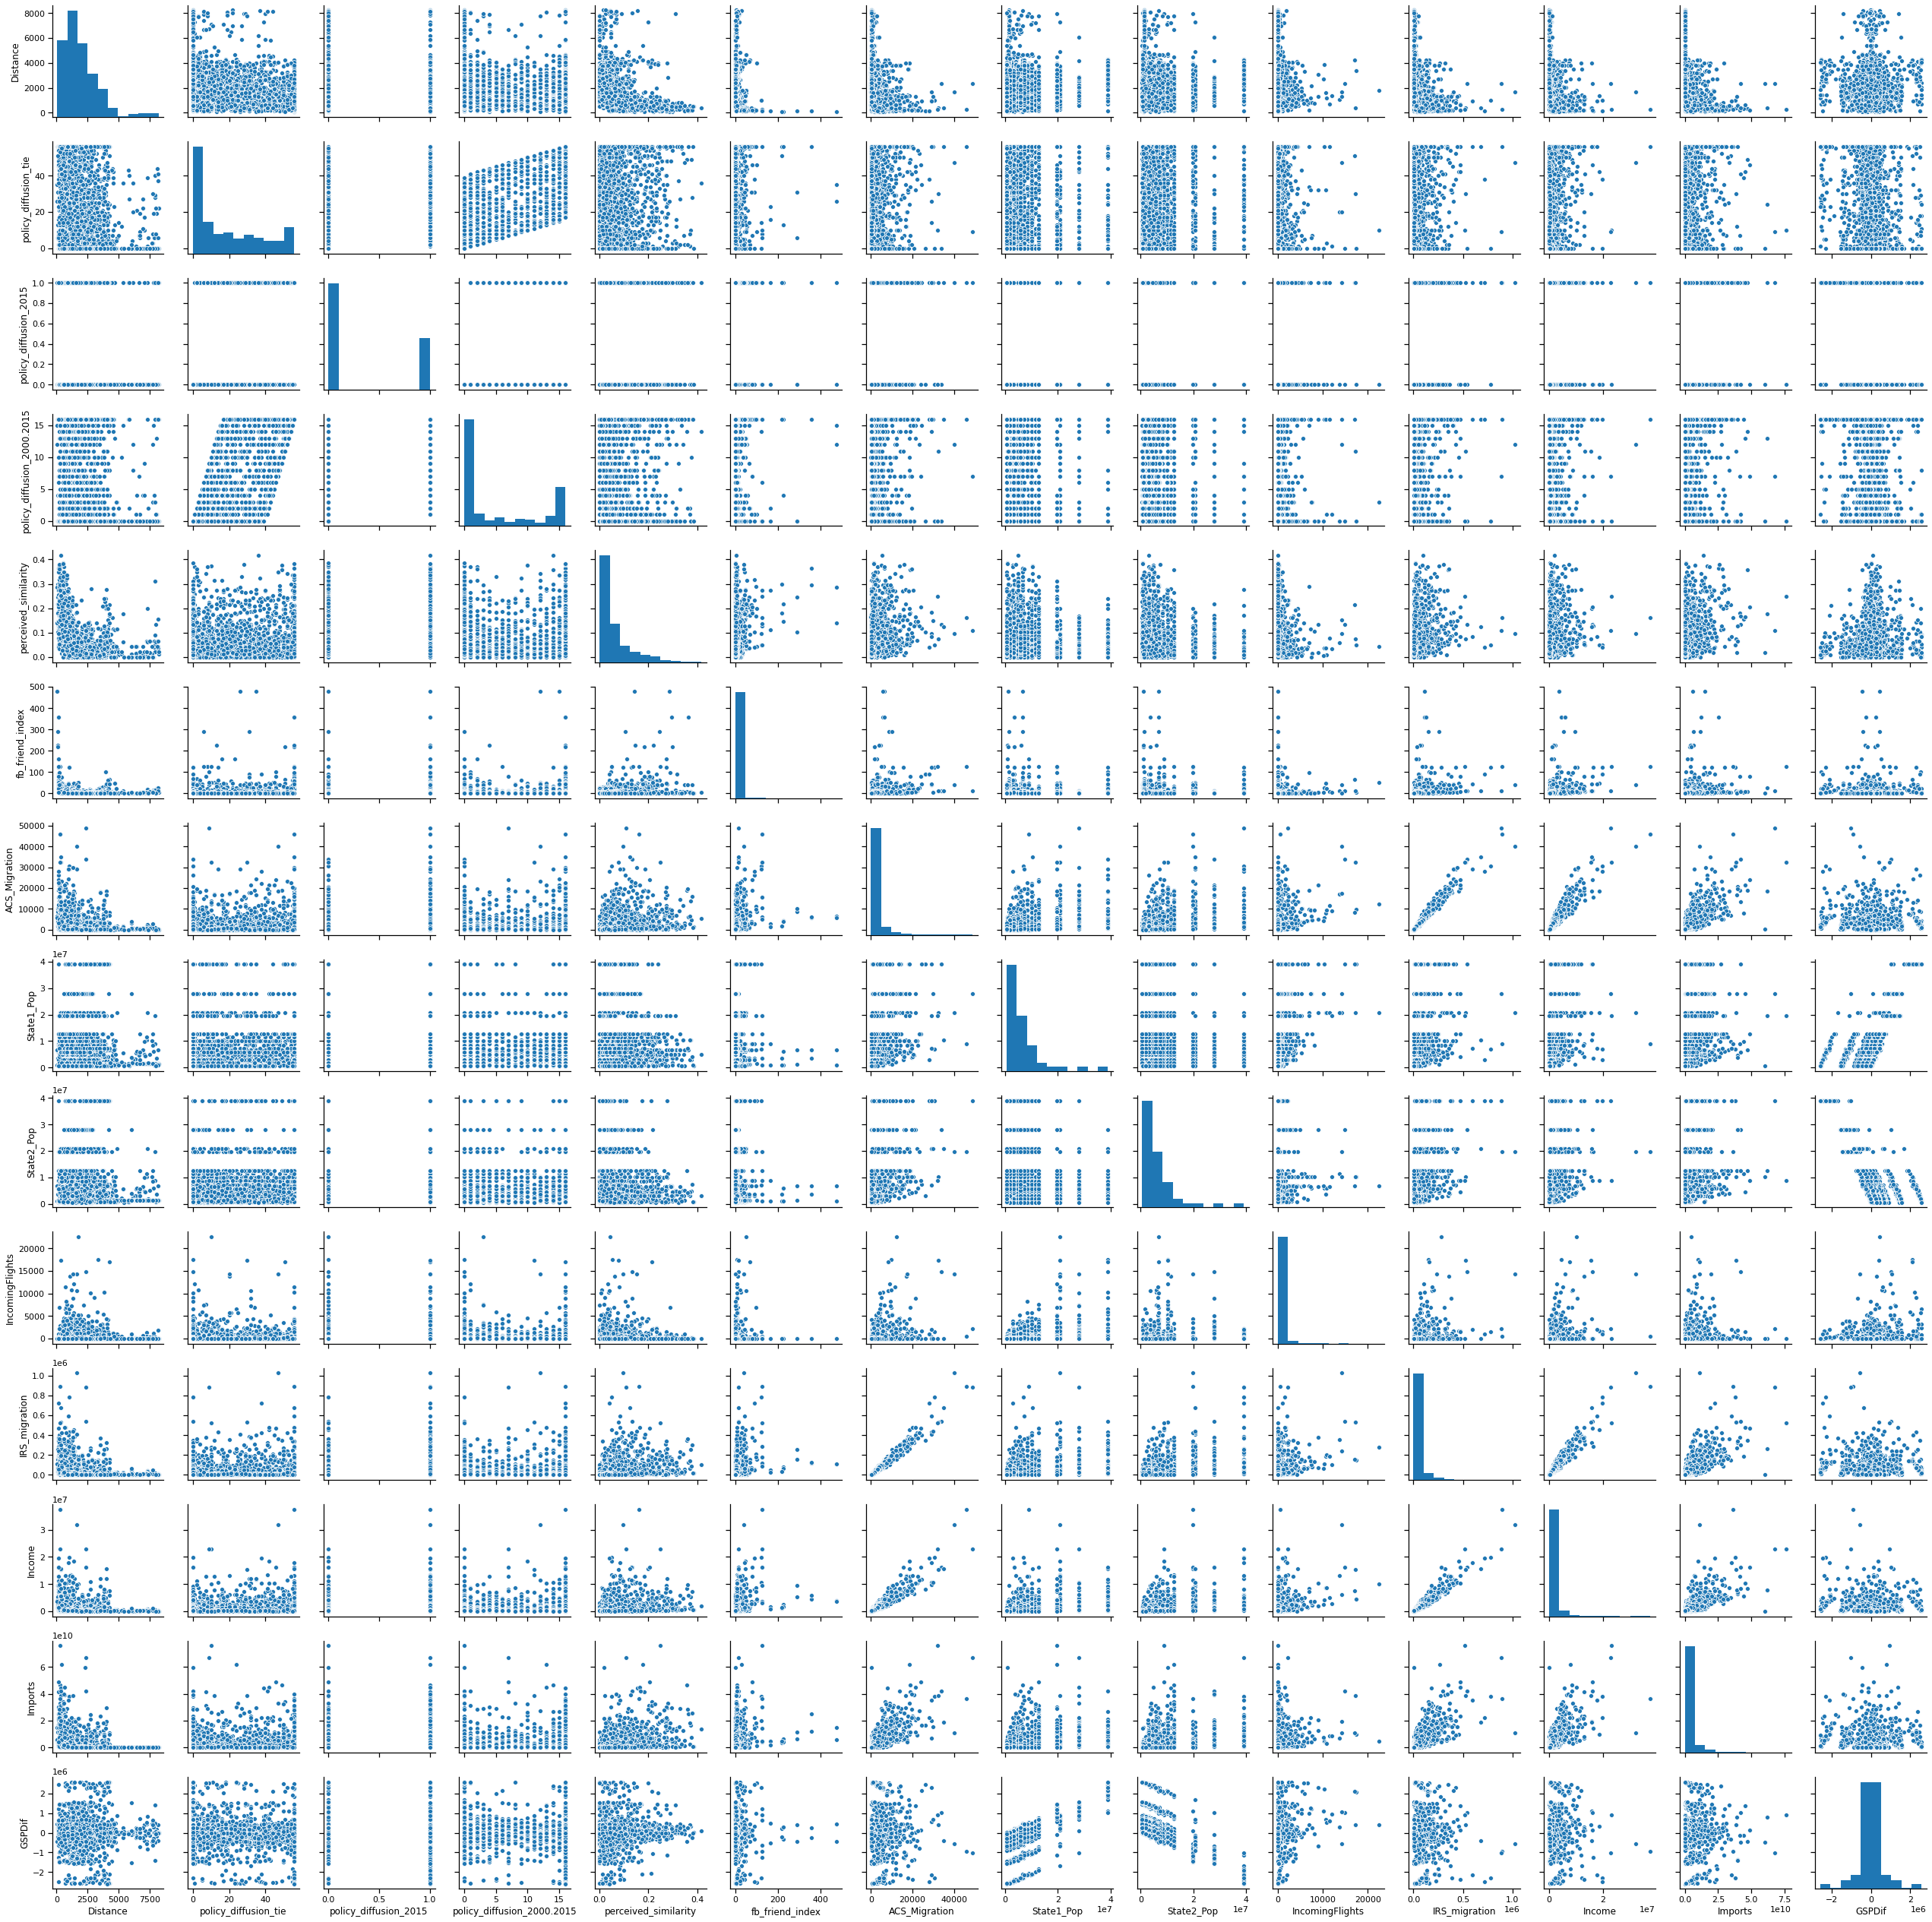

In [153]:
f21=sns.pairplot(sn["Distance policy_diffusion_tie policy_diffusion_2015 policy_diffusion_2000.2015 perceived_similarity fb_friend_index ACS_Migration State1_Pop State2_Pop IncomingFlights IRS_migration Income Imports GSPDif".split()])

In [154]:
f21.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f21econpairplot.png')

*Keeping variables that show some relation to our dependant variables for closer analysis*

<Figure size 720x720 with 0 Axes>

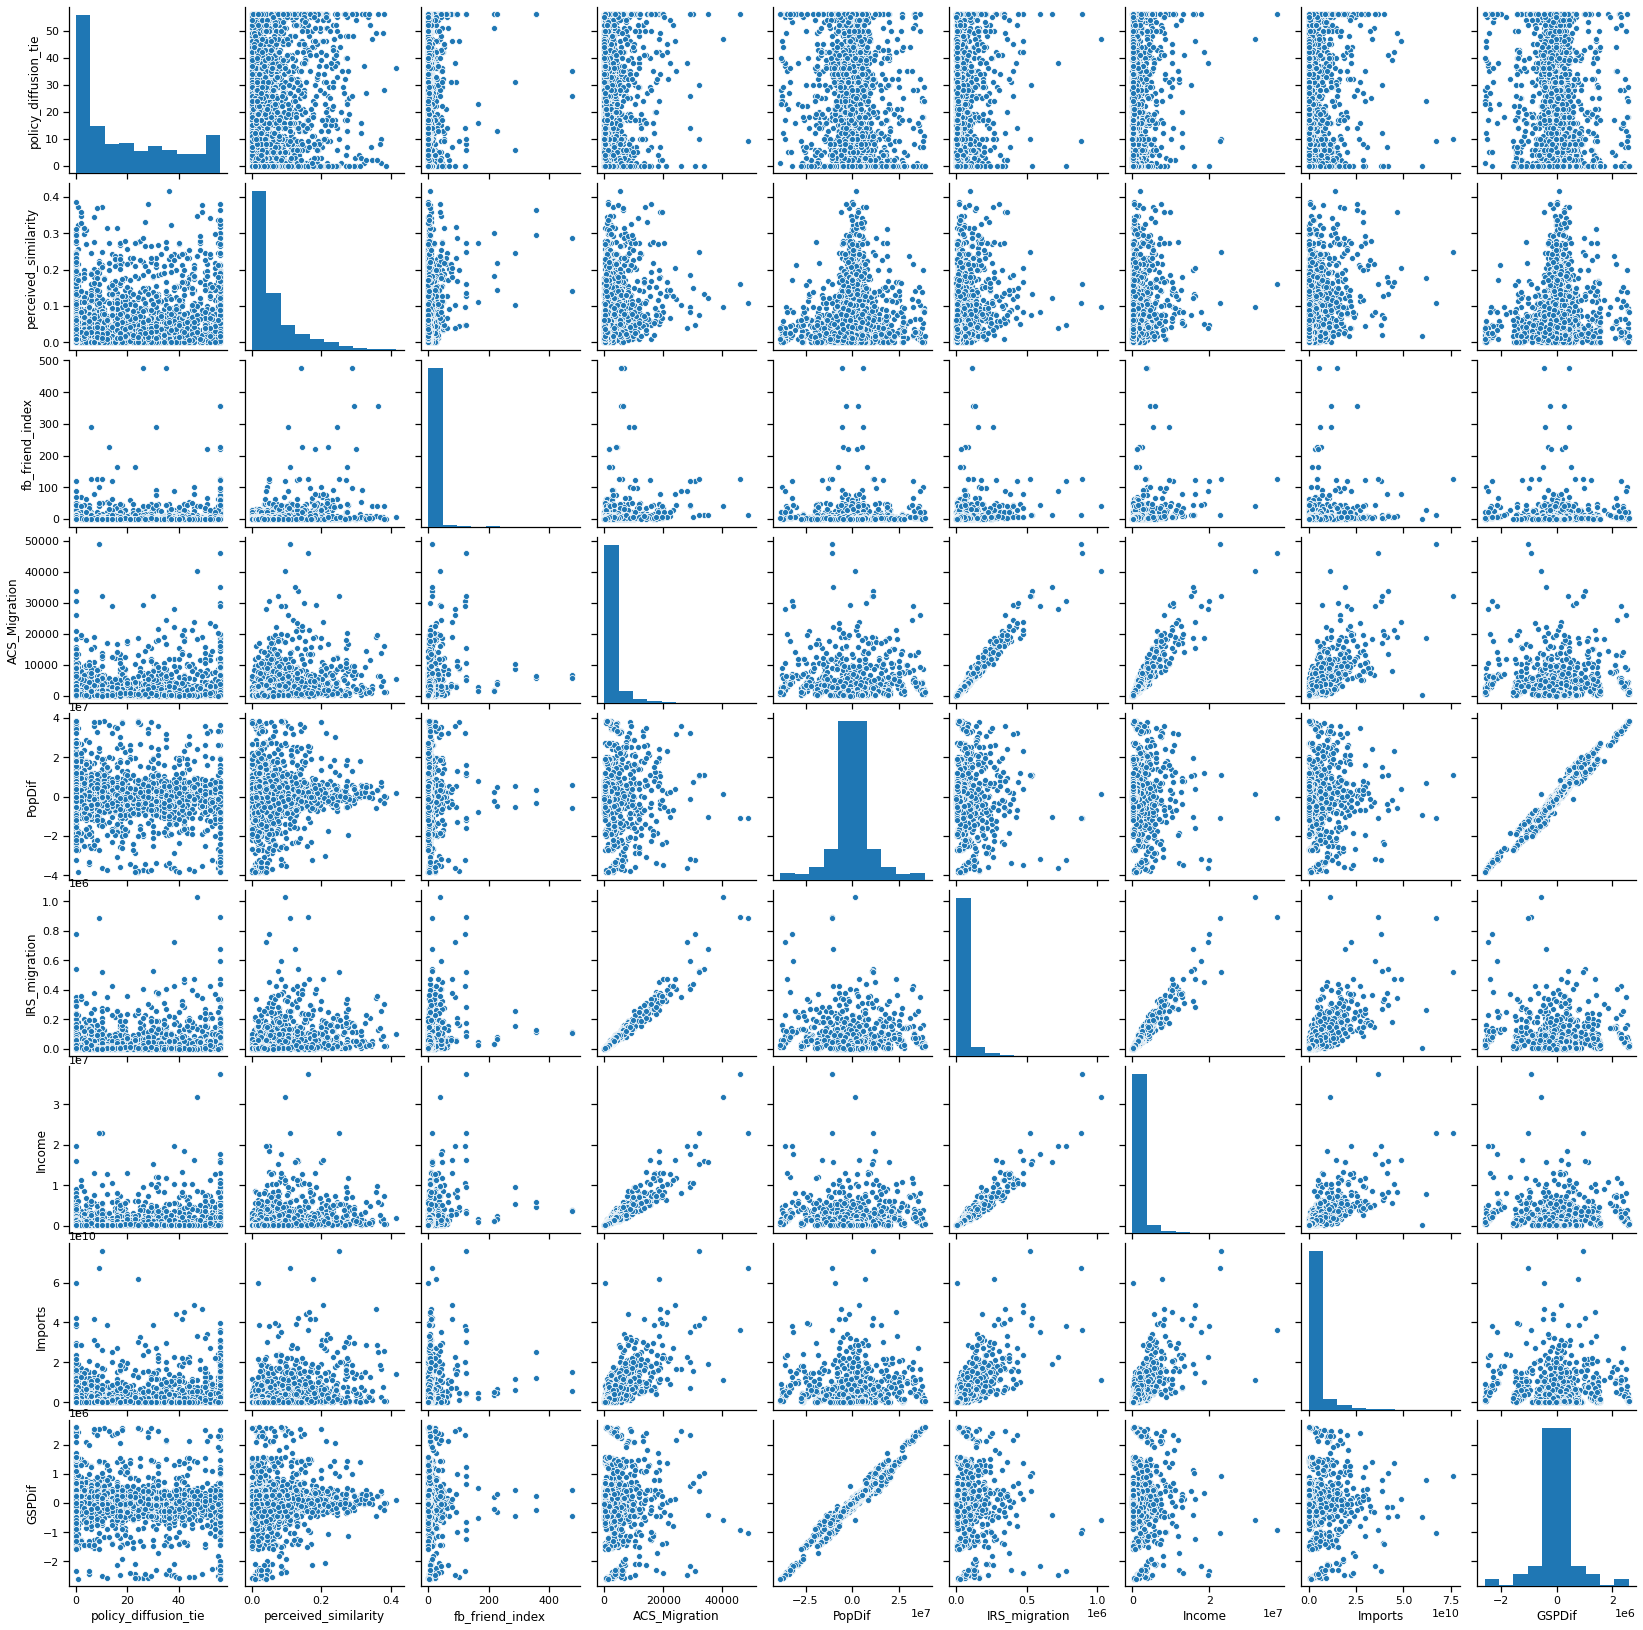

In [48]:
plt.figure(figsize=(10,10))
f2_2=sns.pairplot(sn["policy_diffusion_tie perceived_similarity fb_friend_index ACS_Migration PopDif IRS_migration Income Imports GSPDif".split()])
f2_2.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f22econpairplot.png')

The pairplots (Fig 2.1) show correlation between some variables like Income, IRS migration and Imports. This measn that state-state pairs (dyads) that have higher income transfers between them also have larger imports and migration including that of skilled labor.

## Income

In [ ]:
c=float(input("Quantile of Observations to consider (0,1) ") or "0.99")

In [86]:
x_lim= sn["Income"].quantile(c)

11280291.66999996

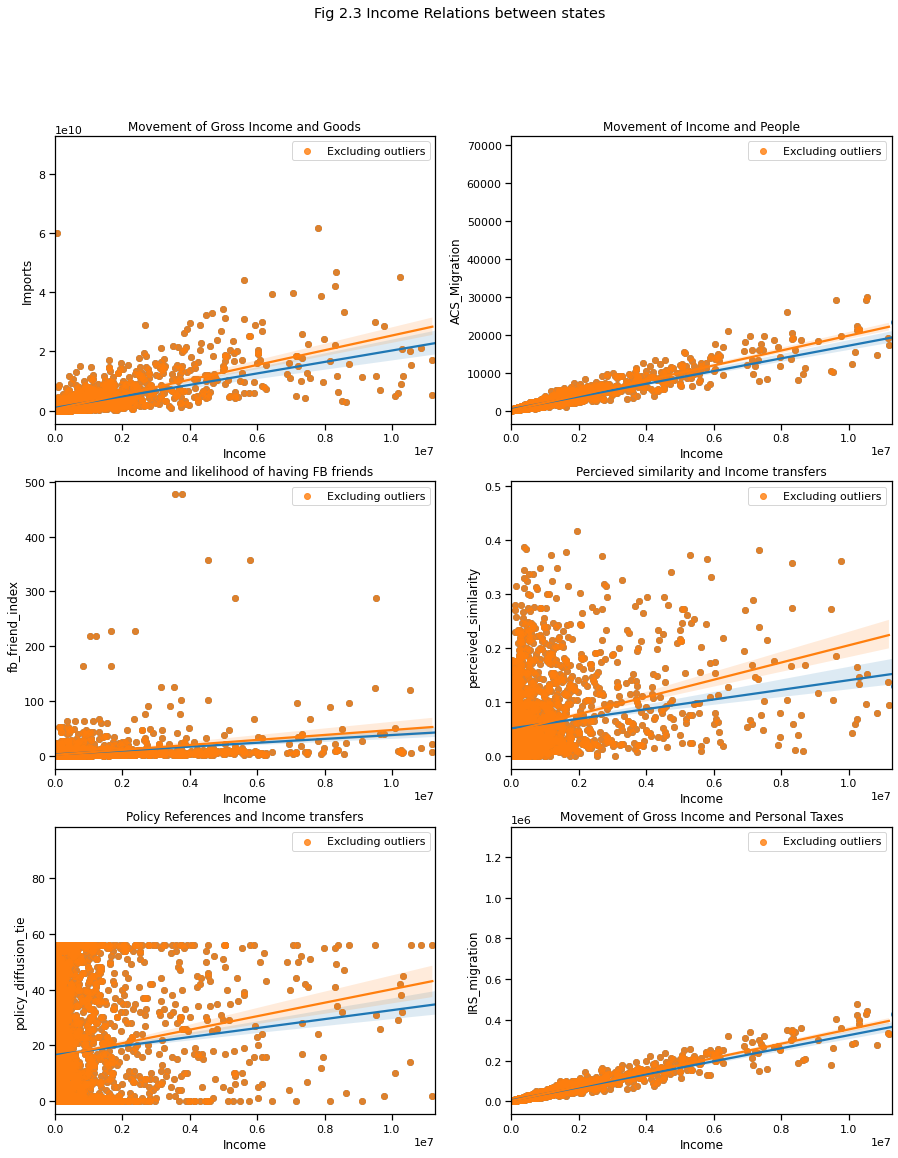

In [97]:
f23, axes = plt.subplots(3, 2, figsize=(15,18))
f23.suptitle("Fig 2.3 Income Relations between states")
sns.regplot(x='Income',y='Imports', data=sn, ax=axes[0,0])
axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
axes[0,0].set_xlim(0,sn["Income"].quantile(c))
sns.regplot(x='Income',y='ACS_Migration', data=sn, ax=axes[0,1])
axes[0,1].set(ylabel="Percent", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
axes[0,1].set_xlim(0,sn["Income"].quantile(c))
sns.regplot(x='Income',y='fb_friend_index', data=sn, ax=axes[1,0])
axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
axes[1,0].set_xlim(0,sn["Income"].quantile(c))
sns.regplot(x='Income',y='IRS_migration', data=sn, ax=axes[2,1])
axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
axes[2,1].set_xlim(0,sn["Income"].quantile(c))
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn, ax=axes[2,0])
axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
axes[2,0].set_xlim(0,sn["Income"].quantile(c))
sns.regplot(x='Income',y='perceived_similarity', data=sn, ax=axes[1,1])
axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')
axes[1,1].set_xlim(0,sn["Income"].quantile(c))
#f23.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f23Incomelmplot.png')

#f24.suptitle("Income Relations between states excluding large outliers (Only {} percent of data considered)".format(c*100))
sns.regplot(x='Income',y='Imports', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,0], label="Excluding outliers")
#axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
sns.regplot(x='Income',y='ACS_Migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,1], label="Excluding outliers")
#axes[0,1].set(ylabel="Percent", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
sns.regplot(x='Income',y='fb_friend_index', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,0], label="Excluding outliers")
#axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
sns.regplot(x='Income',y='IRS_migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,1], label="Excluding outliers")
#axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,0], label="Excluding outliers")
#axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
sns.regplot(x='Income',y='perceived_similarity', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,1], label="Excluding outliers")
#axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')
#plt.figlegend(f23, labels, loc = 'lower right, ncol=5, labelspacing=0. )
axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
axes[1,1].legend()
axes[2,0].legend()
axes[2,1].legend()
f23.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f23Incomelmplot.png')

Fig 2.3 which plots the regression relationships confirms the 

In [83]:
c=float(input("Quantile of Observations to consider (0,1) ") or "0.99")

Quantile of Observations to consider (0,1) 


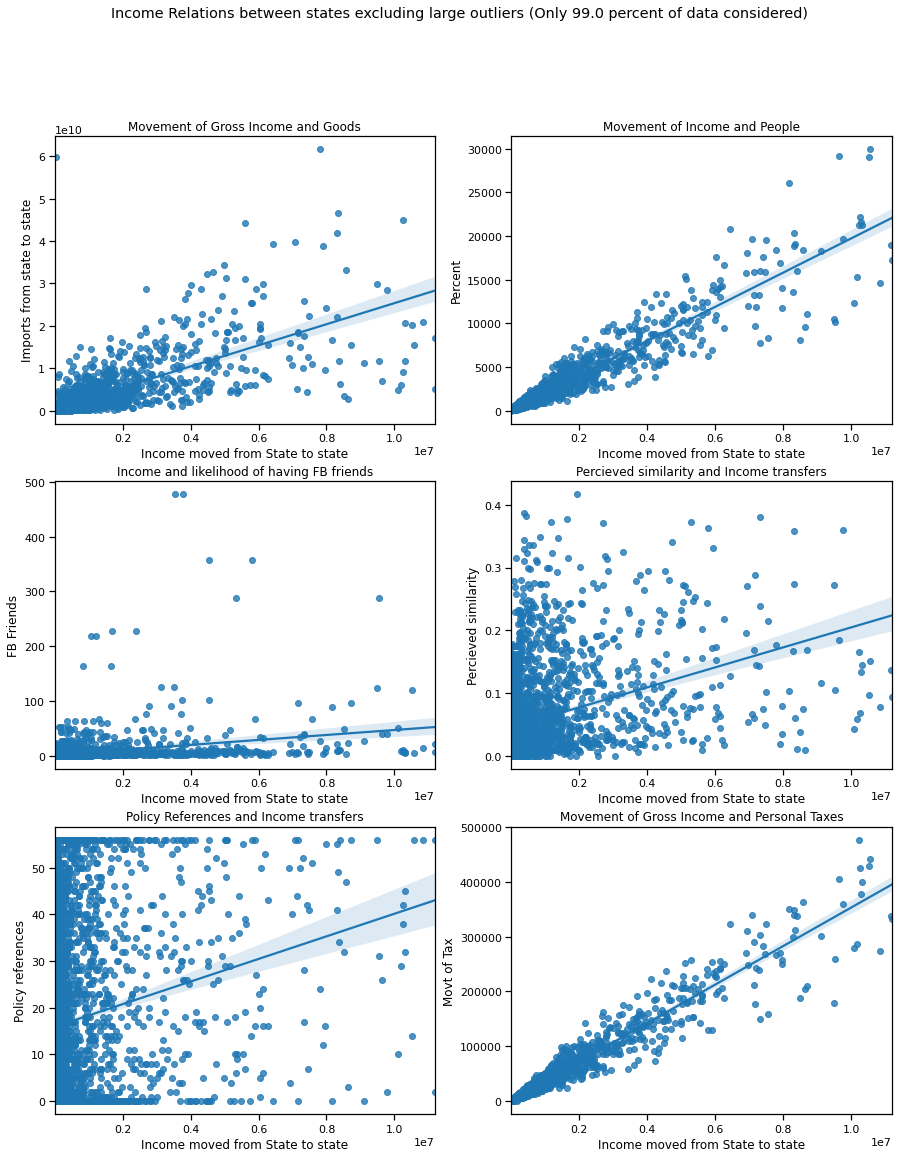

In [84]:
f24, axes = plt.subplots(3, 2, figsize=(15,18))
f24.suptitle("Income Relations between states excluding large outliers (Only {} percent of data considered)".format(c*100))
sns.regplot(x='Income',y='Imports', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,0])
axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
sns.regplot(x='Income',y='ACS_Migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,1])
axes[0,1].set(ylabel="Percent", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
sns.regplot(x='Income',y='fb_friend_index', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,0])
axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
sns.regplot(x='Income',y='IRS_migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,1])
axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,0])
axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
sns.regplot(x='Income',y='perceived_similarity', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,1])
axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')
f24.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data/Out/f24IncomeNOutlmplot.png')

In [ ]:
f25, axes = plt.subplots(2,3, figsize=(20,10))
f25.suptitle("Migration and Inter-State Relations")
sns.regplot(x="IRS_migration", y="fb_friend_index", data=sn, ax=axes[0,0])
sns.regplot(x="IRS_migration", y="perceived_similarity", data=sn, ax=axes[0,1])
sns.regplot(x="IRS_migration", y="policy_diffusion_tie", data=sn, ax=axes[0,2])
sns.regplot(x="ACS_Migration", y="fb_friend_index", data=sn, ax=axes[1,0])
sns.regplot(x="ACS_Migration", y="perceived_similarity", data=sn, ax=axes[1,1])
sns.regplot(x="ACS_Migration", y="policy_diffusion_tie", data=sn, ax=axes[1,2])

In [ ]:
f31, axes = plt.subplots(3,3, figsize=(20,20))
f31.suptitle("Politics and Inter-State Relations")
sns.regplot(x="DemDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="DemDif", y="perceived_similarity", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="DemDif", y="policy_diffusion_tie", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="PIDDif", y="fb_friend_index", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="PIDDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="PIDDif", y="policy_diffusion_tie", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="IdeologyDif", y="fb_friend_index", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="IdeologyDif", y="perceived_similarity", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="IdeologyDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)

In [ ]:
f32, axes = plt.subplots(4,3, figsize=(20,20))
f32.suptitle("Liberal Thought and Inter-State Relations")
sns.regplot(x="MassSocLibDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="MassSocLibDif", y="perceived_similarity", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="MassSocLibDif", y="policy_diffusion_tie", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="MassEconLibDif", y="fb_friend_index", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="MassEconLibDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="MassEconLibDif", y="policy_diffusion_tie", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="PolSocLibDif", y="fb_friend_index", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="PolSocLibDif", y="perceived_similarity", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="PolSocLibDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="PolEconLibDif", y="fb_friend_index", data=sn, ax=axes[3,0], order=2)
sns.regplot(x="PolEconLibDif", y="perceived_similarity", data=sn, ax=axes[3,1], order=2)
sns.regplot(x="PolEconLibDif", y="policy_diffusion_tie", data=sn, ax=axes[3,2], order=2)

In [ ]:
f41, axes = plt.subplots(3,4, figsize=(20,20))
f41.suptitle("Racial Composition and Inter-State Relations")
sns.regplot(x="NativeDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="NativeDif", y="perceived_similarity", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="NativeDif", y="policy_diffusion_tie", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="LatinoDif", y="fb_friend_index", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="LatinoDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="LatinoDif", y="policy_diffusion_tie", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="WhiteDif", y="fb_friend_index", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="WhiteDif", y="perceived_similarity", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="WhiteDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="BlackDif", y="fb_friend_index", data=sn, ax=axes[0,3], order=2)
sns.regplot(x="BlackDif", y="perceived_similarity", data=sn, ax=axes[1,3], order=2)
sns.regplot(x="BlackDif", y="policy_diffusion_tie", data=sn, ax=axes[2,3], order=2)

In [ ]:
f42, axes = plt.subplots(3,4, figsize=(20,20))
f42.suptitle("Religious Composition and Inter-State Relations")
sns.regplot(x="ChristianDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="ChristianDif", y="perceived_similarity", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="ChristianDif", y="policy_diffusion_tie", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="EvangelicalDif", y="fb_friend_index", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="EvangelicalDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="EvangelicalDif", y="policy_diffusion_tie", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="MuslimDif", y="fb_friend_index", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="MuslimDif", y="perceived_similarity", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="MuslimDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="NonesDif", y="fb_friend_index", data=sn, ax=axes[0,3], order=2)
sns.regplot(x="NonesDif", y="perceived_similarity", data=sn, ax=axes[1,3], order=2)
sns.regplot(x="NonesDif", y="policy_diffusion_tie", data=sn, ax=axes[2,3], order=2)

In [ ]:
sns.clustermap(sn[sn["Income"]<=sn["Income"].quantile(.95)]["SameRegion SameDivision Border Distance ACS_Migration IncomingFlights IRS_migration Income GSPDif DemDif IdeologyDif PIDDif policy_diffusion_tie MassSocLibDif MassEconLibDif PolSocLibDif PolEconLibDif perceived_similarity fb_friend_index RaceDif LatinoDif WhiteDif BlackDif AsianDif NativeDif ReligDif ChristianDif JewishDif MuslimDif BuddhistDif HinduDif NonesDif NPDif".split()])

Last Line Update 3